In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
BANDIT_MEANS = [1.5,2.5,0.5,4,3.5]

In [5]:
def get_bandits(dists):
    bandits = [Bandit(p,i) for p,i in zip(dists,range(1,len(dists)+1)) ]
    
    return bandits

In [6]:
trials = 100000

In [12]:
def experiment(bandits,epsilon,trials):
    
    explore=0
    exploit=0
    
    best=0
    
    rewards=[0]*trials
    
    optimal = np.argmax(BANDIT_MEANS)
    

    
    for n in range(trials):
        
        i=0
        
    
        p = np.random.random()
    
    
    
        if p < epsilon:
            explore+=1
        
            i = np.random.randint(len(bandits))
            
            
        else:
            exploit+=1
            
            i = np.argmax([x.m_estimate for x in bandits])
        
        
           
        
        if i==optimal:
            best+=1
    
        x = bandits[i].play()
        
        rewards[n] = x
            
        bandits[i].update(x)
    
    print(f"epsilon = {epsilon}")
    print(f"number of times spent on the optimal machine = {best}")
    print(f"number of explores = {explore}")
    
    print()
    
    for b in bandits:
        print(f"estimated mean for machine {b.i} = {b.m_estimate}")
    
    cumulative_avg = np.cumsum(rewards)/(np.arange(trials)+1)
    
    for b in bandits:
        
        plt.plot(np.ones(trials)*b.m)
    
   
    
    plt.plot(cumulative_avg)
    
    plt.xscale('log')
    
    
    plt.show()
    
    return cumulative_avg
        

    
        
        
        
    
    

In [19]:


def graph(epsilons):
    
    averages = [experiment(get_bandits(BANDIT_MEANS),eps,trials) for eps in epsilons]

    for i in range(len(epsilons)):
    
        plt.plot(averages[i],label=f"epsilon = {epsilons[i]}")

    plt.xscale('log')
    plt.legend()

    plt.show()

In [20]:
epsilons = [0.2,0.15,0.1,0.05,0.01]

epsilon = 0.2
number of times spent on the optimal machine = 84077
number of explores = 19864

estimated mean for machine 1 = 1.4959983143668605
estimated mean for machine 2 = 2.503883397528312
estimated mean for machine 3 = 0.49579031005839896
estimated mean for machine 4 = 4.000728174397084
estimated mean for machine 5 = 3.4744390760055133


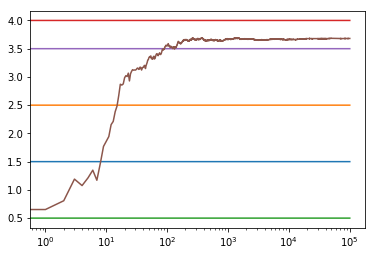

epsilon = 0.15
number of times spent on the optimal machine = 87812
number of explores = 15069

estimated mean for machine 1 = 1.5062800475304452
estimated mean for machine 2 = 2.508384175231728
estimated mean for machine 3 = 0.4854954668350392
estimated mean for machine 4 = 4.004137052769431
estimated mean for machine 5 = 3.4596178247790568


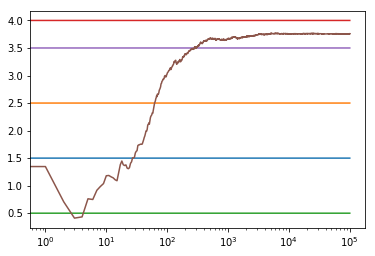

epsilon = 0.1
number of times spent on the optimal machine = 91992
number of explores = 9954

estimated mean for machine 1 = 1.5097359668151482
estimated mean for machine 2 = 2.4937267779800787
estimated mean for machine 3 = 0.5030386323977649
estimated mean for machine 4 = 4.006188712690783
estimated mean for machine 5 = 3.48854397127909


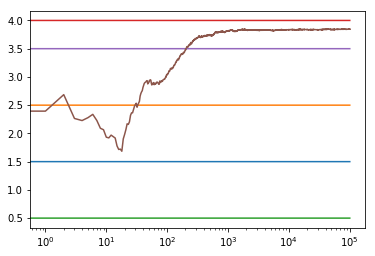

epsilon = 0.05
number of times spent on the optimal machine = 95982
number of explores = 4868

estimated mean for machine 1 = 1.4792008071321612
estimated mean for machine 2 = 2.4743879511516518
estimated mean for machine 3 = 0.4434480033018139
estimated mean for machine 4 = 3.999891576834151
estimated mean for machine 5 = 3.517458841326736


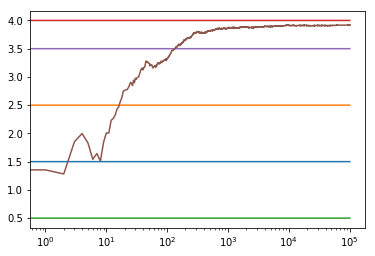

epsilon = 0.01
number of times spent on the optimal machine = 98710
number of explores = 1023

estimated mean for machine 1 = 1.464903093018636
estimated mean for machine 2 = 2.5314228049011014
estimated mean for machine 3 = 0.5645819895215145
estimated mean for machine 4 = 4.0055121622361884
estimated mean for machine 5 = 3.5281124117932805


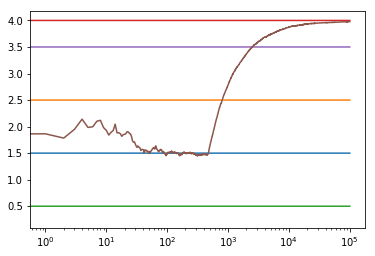

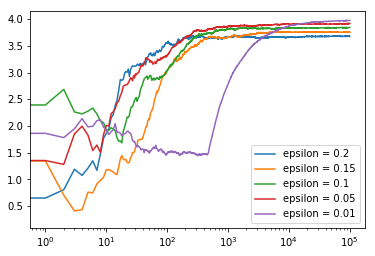

In [21]:
graph(epsilons)